In [90]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas.plotting import lag_plot
from statsmodels.tsa.stattools import adfuller
import warnings
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tools.eval_measures import rmse
import seaborn as sns
import statsmodels.api as spi
from  statsmodels.graphics import tsaplots
from statsmodels.tsa.stattools import pacf
import numpy as np

We will be working with publicly available airline passenger time series data. To start, let’s import the Pandas library and read the airline passenger data into a data frame

In [2]:
data=pd.read_csv('airlines_passengers.csv')

Let’s display the first five rows of data

In [3]:
data.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


We see that the data ends in 1960. The next thing we will want to do is convert the month column into a datetime object. 
This will allow it to programmatically pull time values like the year or month for each record.
To do this, we use the Pandas to_datetime() method. Note that this process automatically inserts the first day of each month, which is basically a dummy value since we have no daily passenger data.

In [18]:
data['Fecha']=pd.to_datetime(data.Month)


The next thing we can do is convert the month column to an index. 


In [20]:
data.index=data['Fecha']

In [86]:
data

,Month,Passengers,Fecha,Difference
Fecha,,,,
1949-01-01,1949-01,112,1949-01-01,NaN
1949-02-01,1949-02,118,1949-02-01,6.0
1949-03-01,1949-03,132,1949-03-01,14.0
1949-04-01,1949-04,129,1949-04-01,-3.0
1949-05-01,1949-05,121,1949-05-01,-8.0
...,...,...,...,...
1960-08-01,1960-08,606,1960-08-01,-16.0
1960-09-01,1960-09,508,1960-09-01,-98.0
1960-10-01,1960-10,461,1960-10-01,-47.0


Let’s generate a time series plot using Seaborn and Matplotlib. This will allow us to visualize the time series data. 
Import the libraries and generate the lineplot. Label the y-axis with Matplotlib “Number of Passengers”

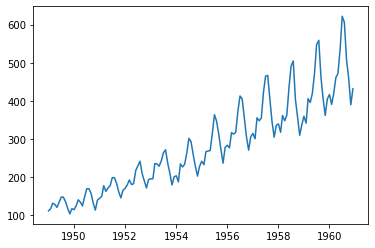

In [22]:
plt.plot(data.index,data.Passengers)

<AxesSubplot:xlabel='Fecha', ylabel='Passengers'>

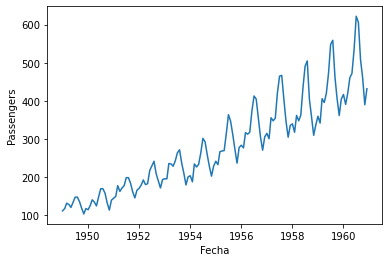

In [25]:
sns.lineplot(data=data, x=data.index, y="Passengers")

Stationarity is a key part of time series analysis. Import the augmented Dickey-Fuller test from the statsmodels package.

In [27]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

result = adfuller(data.Passengers)
print('ADF Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.2f' % result[1])


#not stationary

ADF Test Statistic: 0.82
5% Critical Value: -2.88
p-value: 0.99


Let’s pass our data frame into the adfuller method. 
Here, we specify the autolag parameter as “AIC”, which means that the lag is chosen to minimize the information criterion

In [39]:
data2=pd.DataFrame()
data['Difference'] = data['Passengers'].diff()

Store our results in a dataframe display it

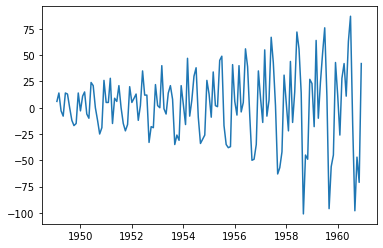

In [44]:
data['Difference']
plt.plot(data['Difference'])

Explain the results

In [43]:
result = adfuller(data.Difference.dropna())
print(result)
print('ADF Test Statistic: %.2f' % result[0])
print('5%% Critical Value: %.2f' % result[4]['5%'])
print('p-value: %.2f' % result[1])

Now the values are stationaty 

(-2.8292668241700007, 0.05421329028382537, 12, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 988.5069317854085)
ADF Test Statistic: -2.83
5% Critical Value: -2.88
p-value: 0.05


Autocorrelation
Checking for autocorrelation in time series data is another important part of the analytic process. 
This is a measure of how correlated time series data is at a given point in time with past values, 
which has huge implications across many industries. For example, if our passenger data has strong autocorrelation, we can assume that high passenger numbers today suggest a strong likelihood that they will be high tomorrow as well.
Please calculate and show the autocorrelation

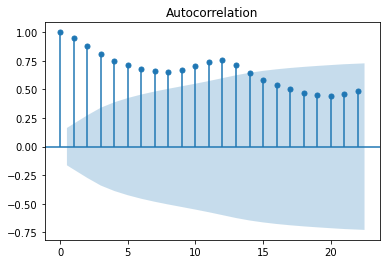

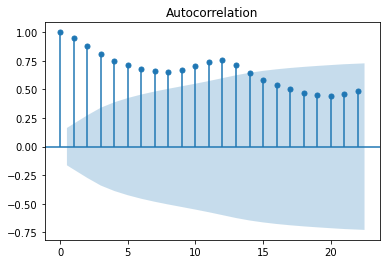

In [48]:
plot_acf(data['Passengers'])


[1.         0.94804734 0.87557484 0.80668116 0.75262542 0.71376997
 0.6817336  0.66290439 0.65561048 0.67094833 0.70271992]


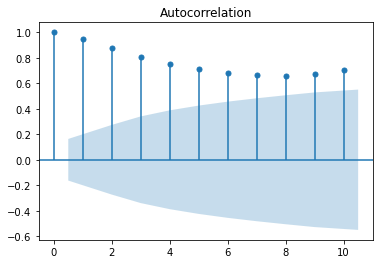

In [59]:
res = spi.tsa.acf(data['Passengers'],nlags = 10,fft = False)
print(res)
acr = tsaplots.plot_acf(data['Passengers'],lags = 10)

Calculate partial autocorrelation

In [68]:
ys = pacf(data['Passengers'], nlags=10)
ys

array([ 1.        ,  0.95467704, -0.26527732,  0.05546955,  0.10885622,
        0.08112579,  0.00412541,  0.15616955,  0.10370833,  0.28878144,
        0.20691805])

In [87]:
data['Passengers']

Fecha
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: Passengers, Length: 144, dtype: int64

Decomposition
Trend decomposition is another useful way to visualize the trends in time series data.
To proceed, let’s import seasonal_decompose from the statsmodels package:
from statsmodels.tsa.seasonal import seasonal_decompose


In [85]:
decompose = seasonal_decompose(data['Passengers'])


Next, let’s pass our data frame into the seasonal_decompose method and plot the result:
decompose = 
decompose.plot()
plt.show()


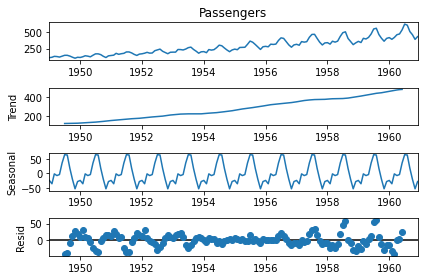

In [82]:
decompose= decompose.plot() 
plt.show()


Can you describe the charts?


In [ ]:
#the is a remarkable trend 

Let's check the models on our dataset. Please note, if the dataset is non-stationary, you need to make it stationary

<AxesSubplot:xlabel='Fecha', ylabel='difference2'>

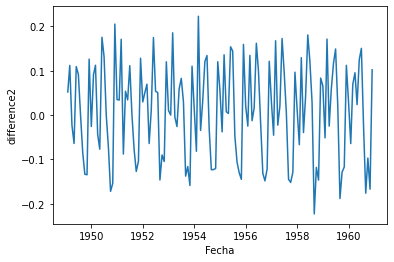

In [159]:
data['difference2']=data['Passengers'].diff().diff(12).dropna()
data['difference2'] = np.log(data['Passengers']).diff().dropna() # diff for difference

sns.lineplot(data=data, x=data.index, y='difference2')

In [160]:
test=data['difference2'][-10:]
total=data['difference2'][:-10]


MA(1)

In [161]:
mod = ARMA(total.dropna(), order=(0, 1))
res1 = mod.fit()

/Users/anak/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/anak/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so in

Display the output

In [162]:
print(res.summary())

                              ARMA Model Results                              
Dep. Variable:            difference2   No. Observations:                  121
Model:                     ARMA(2, 2)   Log Likelihood                -450.842
Method:                       css-mle   S.D. of innovations              9.938
Date:                Wed, 19 Jan 2022   AIC                            913.684
Time:                        13:23:52   BIC                            930.459
Sample:                    02-01-1950   HQIC                           920.497
                         - 02-01-1960                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2208      0.122      1.807      0.071      -0.019       0.460
ar.L1.difference2     0.2321      0.248      0.935      0.350      -0.255       0.719
ar.L2.difference2     0.

MA(2)

In [163]:
mod = ARMA(total.dropna(), order=(0, 2))
res2 = mod.fit()

/Users/anak/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


Display the output

In [164]:
print(res2.summary())

                              ARMA Model Results                              
Dep. Variable:            difference2   No. Observations:                  133
Model:                     ARMA(0, 2)   Log Likelihood                 120.188
Method:                       css-mle   S.D. of innovations              0.097
Date:                Wed, 19 Jan 2022   AIC                           -232.376
Time:                        13:23:53   BIC                           -220.815
Sample:                    02-01-1949   HQIC                          -227.678
                         - 02-01-1960                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0101      0.001     14.461      0.000       0.009       0.011
ma.L1.difference2    -0.1508      0.067     -2.247      0.025      -0.282      -0.019
ma.L2.difference2    -0.

AR(2)

In [166]:
mod = ARMA(total.dropna(), order=(2, 0))
res3 = mod.fit()
print(res3.summary())

                              ARMA Model Results                              
Dep. Variable:            difference2   No. Observations:                  133
Model:                     ARMA(2, 0)   Log Likelihood                 114.828
Method:                       css-mle   S.D. of innovations              0.102
Date:                Wed, 19 Jan 2022   AIC                           -221.656
Time:                        13:23:59   BIC                           -210.094
Sample:                    02-01-1949   HQIC                          -216.958
                         - 02-01-1960                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0092      0.009      0.993      0.321      -0.009       0.027
ar.L1.difference2     0.2203      0.085      2.582      0.010       0.053       0.388
ar.L2.difference2    -0.

/Users/anak/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/anak/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so in

ARMA (?,?)

In [167]:
mod = ARMA(total.dropna(), order=(2, 1))
res4 = mod.fit()


/Users/anak/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/anak/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so in

Display the output

In [168]:
print(res4.summary())

                              ARMA Model Results                              
Dep. Variable:            difference2   No. Observations:                  133
Model:                     ARMA(2, 1)   Log Likelihood                 129.649
Method:                       css-mle   S.D. of innovations              0.090
Date:                Wed, 19 Jan 2022   AIC                           -249.299
Time:                        13:24:01   BIC                           -234.847
Sample:                    02-01-1949   HQIC                          -243.426
                         - 02-01-1960                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0101      0.000     20.691      0.000       0.009       0.011
ar.L1.difference2     0.9824      0.080     12.298      0.000       0.826       1.139
ar.L2.difference2    -0.

ARIMA(?,?)

In [169]:
mod = ARMA(total.dropna(), order=(2, 2))
res5 = mod.fit()


/Users/anak/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/Users/anak/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so in

Display the output

In [170]:
print(res5.summary())

                              ARMA Model Results                              
Dep. Variable:            difference2   No. Observations:                  133
Model:                     ARMA(2, 2)   Log Likelihood                 128.500
Method:                       css-mle   S.D. of innovations              0.091
Date:                Wed, 19 Jan 2022   AIC                           -245.000
Time:                        13:24:03   BIC                           -227.658
Sample:                    02-01-1949   HQIC                          -237.953
                         - 02-01-1960                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0101      0.001     16.027      0.000       0.009       0.011
ar.L1.difference2     0.1912      0.157      1.221      0.222      -0.116       0.498
ar.L2.difference2     0.

Let’s calculate root mean squared error (RMSE) for all the models. Explain the values

In [174]:
#MA1 res1
predictions1=res1.predict(start=test.index[-10],end=test.index[-1])
#MA2 res2
predictions2=res2.predict(start=test.index[-10],end=test.index[-1])
#AR2 res3
predictions3=res3.predict(start=test.index[-10],end=test.index[-1])
#ARMA (2,1)
predictions4=res4.predict(start=test.index[-10],end=test.index[-1])
#ARMA (2,2)
predictions5=res5.predict(start=test.index[-10],end=test.index[-1])


In [175]:
print(rmse(predictions1,test))
print(rmse(predictions2,test))
print(rmse(predictions3,test))
print(rmse(predictions4,test))
print(rmse(predictions5,test))

0.11577498656501434
0.11092612962275791
0.1153978602821225
0.10540450195170352
0.10849132939754755


In [ ]:
#The best approximation for the model preciton regarding the erro is the ARMA(2,1) model

Calculate AIC

In [173]:
print(res1.aic)
print(res2.aic)
print(res3.aic)
print(res4.aic)
print(res5.aic)


-221.4180376365224
-232.37633901446077
-221.65577434321892
-249.29873506892443
-244.99984346837914
